In [1]:
import tensorflow as tf
from models import MyPerceptronKeras

In [142]:
model = MyPerceptronKeras()

In [112]:
x = tf.constant([1.0, 2.0])
xs = tf.constant([[1.0, 3.0], [5.0, 4.0]], dtype=tf.float64)
xs.shape
# w = tf.constant([3.0, 3.0])

TensorShape([2, 2])

In [113]:
y_predicted = model(xs)
y_predicted

<tf.Tensor: shape=(2,), dtype=float64, numpy=array([ 1., -2.])>

In [114]:
y_true = tf.constant([-1.0, 1.0], dtype=tf.float64)
y_true

<tf.Tensor: shape=(2,), dtype=float64, numpy=array([-1.,  1.])>

In [115]:
def loss(y_predicted, y_true):
    return tf.reduce_sum(tf.maximum(tf.cast(0.0, dtype=tf.float64), -y_true*y_predicted))
    

In [116]:
loss(y_predicted, y_true)

<tf.Tensor: shape=(), dtype=float64, numpy=3.0>

In [143]:
import json

In [144]:
with open('../synthetic_data/train.json') as f:
    d = json.load(f)

In [145]:
xs = d['user_data']['0']['x']
ys = d['user_data']['0']['y']

In [146]:
tf_d = tf.data.Dataset.from_tensor_slices((xs, ys)).shuffle(100).map(lambda a,b: (tf.cast(a, tf.float64), tf.cast(b, tf.float64)))

In [147]:
lr = 0.02

In [148]:
loss_history = []

In [149]:
for _ in range(10):
    loss_val = tf.Variable(0.0, dtype=tf.float64)
    count = 0
    for batch in tf_d.batch(5):
        lr -= 0.001
        y_predicted = model(batch[0])
        # print(y_predicted.numpy())
        y_true = batch[1]
        print(loss(y_predicted, y_true))
        loss_val.assign_add(loss(y_predicted, y_true)); count += 1
        toMul = y_true*tf.maximum(tf.cast(0.0, dtype=tf.float64), -y_true*y_predicted)
        grad_w_all = tf.transpose(tf.transpose(batch[0]) * toMul)
        grad_w = tf.reduce_sum(grad_w_all, 0)
        grad_b = tf.reduce_sum(toMul, 0)
        
        model.w.assign_add(lr*grad_w)
        model.b.assign_add(lr*grad_b)
    print("loss:", loss_val.numpy()/count)
    loss_history.append(loss_val/count)


tf.Tensor(1.4819955229759216, shape=(), dtype=float64)
tf.Tensor(2.872179559372631, shape=(), dtype=float64)
tf.Tensor(3.368899772221416, shape=(), dtype=float64)
tf.Tensor(4.382815980793678, shape=(), dtype=float64)
tf.Tensor(0.6020323503168308, shape=(), dtype=float64)
tf.Tensor(5.850208887943895, shape=(), dtype=float64)
tf.Tensor(6.4780587641014895, shape=(), dtype=float64)
tf.Tensor(11.536612583118773, shape=(), dtype=float64)
tf.Tensor(7.963765244313512, shape=(), dtype=float64)
tf.Tensor(8.949880921236055, shape=(), dtype=float64)
tf.Tensor(11.228386322033938, shape=(), dtype=float64)
tf.Tensor(7.595105719038031, shape=(), dtype=float64)
tf.Tensor(0.0, shape=(), dtype=float64)
tf.Tensor(7.580947022430509, shape=(), dtype=float64)
tf.Tensor(6.83977052120462, shape=(), dtype=float64)
tf.Tensor(11.54905411286052, shape=(), dtype=float64)
tf.Tensor(12.069851347926054, shape=(), dtype=float64)
tf.Tensor(8.32492541056427, shape=(), dtype=float64)
tf.Tensor(3.8730514030224894, shape=()

In [135]:
import matplotlib.pyplot as plt

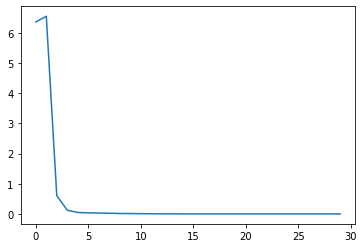

In [136]:
plt.plot(range(len(loss_history)), loss_history)

In [155]:
model.b.numpy(), model.w.numpy()

(-0.64796245, array([-0.08881515,  1.372045  ], dtype=float32))

In [138]:
model.b.numpy(), model.w.numpy()

(-0.634912, array([-0.19638506,  1.399368  ], dtype=float32))

In [156]:
tf.norm([-0.19638506,  1.399368  ])

<tf.Tensor: shape=(), dtype=float32, numpy=1.413081>

In [157]:
tf.norm([-0.08881515,  1.372045  ])

<tf.Tensor: shape=(), dtype=float32, numpy=1.3749166>